In [1]:
#import libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
dataset = pd.read_csv('data/new_appdata.csv')

In [3]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,SavingsCount,CCCount,LoansCount,CMCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,1,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,1,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,0,1,3
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,0,1,2


In [4]:
#preprocessing
response = dataset['enrolled']
dataset = dataset.drop(columns='enrolled')

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset,response,test_size=0.2,random_state=0)

In [6]:
#remove use column by both test and train,but keep track for identification of the each user
train_identifier = X_train['user']
test_identifier = X_test['user']
X_train = X_train.drop(columns='user')
X_test = X_test.drop(columns='user')

In [7]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [8]:
sc_X = StandardScaler()

In [9]:
#since sc return numpy array,we loose column names and index,so we scale in to  a dataframe
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

#add columns
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

#add index
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

#assign back to original variables
X_train = X_train2
X_test = X_test2

C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\rajit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,SavingsCount,CCCount,LoansCount,CMCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.289185,1.785389,-0.763372
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,-0.289185,0.309800,0.057524
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,1.336593,1.785389,0.878421
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.289185,0.309800,-0.763372
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,-0.289185,-1.165789,0.878421


In [11]:
X_test.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,SavingsCount,CCCount,LoansCount,CMCount
11841,-1.489818,-1.553579,0.856728,0.819520,-0.34683,-0.457453,2.246319,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.296641,-0.260877,-0.289185,-1.165789,-0.763372
19602,0.972325,-0.881364,-0.528611,0.564865,-0.34683,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.753543,-0.260877,-0.289185,0.309800,-0.763372
45519,-1.489818,0.328622,0.487305,-0.644744,-0.34683,2.186018,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.332655,-0.260877,-0.289185,1.785389,0.057524
25747,0.972325,0.866394,-0.990390,-0.517417,-0.34683,-0.457453,2.246319,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.481993,-0.260877,-0.289185,-1.165789,-0.763372
42642,0.972325,-1.553579,-0.159187,0.692193,-0.34683,-0.457453,-0.445173,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.604204,1.857638,2.962372,-1.165789,-0.763372


In [12]:
#model building

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,penalty='l1')
classifier.fit(X_train,y_train)

C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

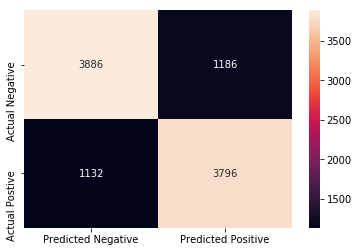

In [44]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Predicted Negative','Predicted Positive'],yticklabels=['Actual Negative','Actual Postive'])

In [45]:
ac_score = accuracy_score(y_test,y_pred)
ac_score

0.7682

In [46]:
# True Positive/(True Positive+Flase negative)=>predicted all postive
pr_score = precision_score(y_test,y_pred)
pr_score

0.7619429947812124

In [47]:
#True Positive/(True Positive+Flase Positive)=>actual all postive
re_score = recall_score(y_test,y_pred)
re_score

0.7702922077922078

In [48]:
# 2.precision.recall/(precision+recall)
f1 = f1_score(y_test,y_pred)
f1

0.7660948536831482

In [38]:
#K-Flod cross validation 

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 0.77 (+/- 0.01)


In [54]:
#Formatting the final result

In [56]:
final_results = pd.concat([y_test,test_identifier],axis=1).dropna()

In [58]:
final_results['predicted_result'] = y_pred

In [67]:
final_results[['user','enrolled','predicted_result']].reset_index(drop=True).head()


,user,enrolled,predicted_result
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
